In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
%reset -f

In [2]:
import numpy as np
import cv2
from pylab import*
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import datetime
import imageio
from skimage import io,color
from sklearn.model_selection import train_test_split

# 1. Compute the mean and first K = 50 eigen-faces for the training images with no landmark alignment, and use them to reconstruct the remaining 200 test faces.

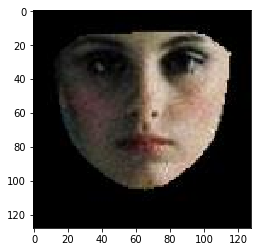

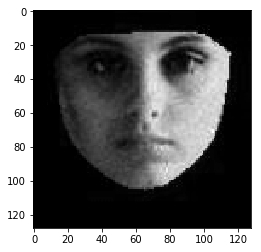

(1000, 128, 128, 3)


In [5]:
str='E:/Stats M231 Pattern Recognition and Machine Learning/Project1/images/*.jpg' 
coll = io.ImageCollection(str)
img_rgb=io.concatenate_images(coll)
img_hsv=np.zeros(img_rgb.shape)
for i in range(img_rgb.shape[0]):
    img_hsv[i]=color.rgb2hsv(img_rgb[i])
plt.imshow(img_rgb[800])
plt.show()
plt.imshow(img_hsv[800,:,:,2], cmap='gray')
plt.show()
print (img_hsv.shape)

In [10]:
img_rgb[0]

(128, 128, 3)

training_data: (800, 128, 128, 3)
testing_data: (200, 128, 128, 3)


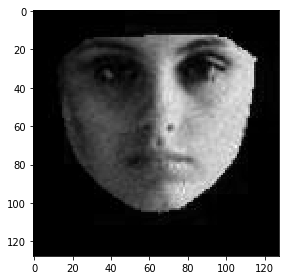

In [5]:
#X_train, X_test, = train_test_split(img_hsv, test_size=0.2,random_state = 1)
num_train=800
num_total=1000
X_train=img_hsv[0:num_train,:,:,:]
X_test=img_hsv[num_train:num_total,:,:,:]
print ("training_data:",X_train.shape)
print ("testing_data:",X_test.shape)
X_train_V= np.reshape(X_train[:,:,:,2],[800,-1])
X_test_V= np.reshape(X_test[:,:,:,2],[200,-1])
io.imshow(np.reshape(X_test_V[0],[128,128]))

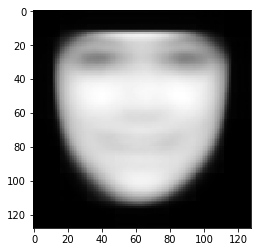

In [6]:
mean_X_train_V = X_train_V.mean(axis=0)
plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')

In [7]:
mean_X_train_V = X_train_V.mean(axis=0)
X_train_V_norm=X_train_V
for i in range(X_train_V.shape[0]):
    X_train_V_norm[i] = X_train_V[i]- mean_X_train_V
M = dot(X_train_V_norm,np.transpose(X_train_V_norm))
w,v=np.linalg.eigh(M)
idx=w.argsort()[::-1]
w = w[idx]
v = v[:,idx]
k=50
e=np.zeros((128*128,k))
for i in range(k):
    e[:,i]=dot(np.transpose(X_train_V_norm),v[:,i])
    e[:,i]=e[:,i]/sqrt(w[i])

print ("eigen_face:",e.shape)    

eigen_face: (16384, 50)


## i) Display the first 10 eigen-faces

<Figure size 1440x720 with 0 Axes>

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

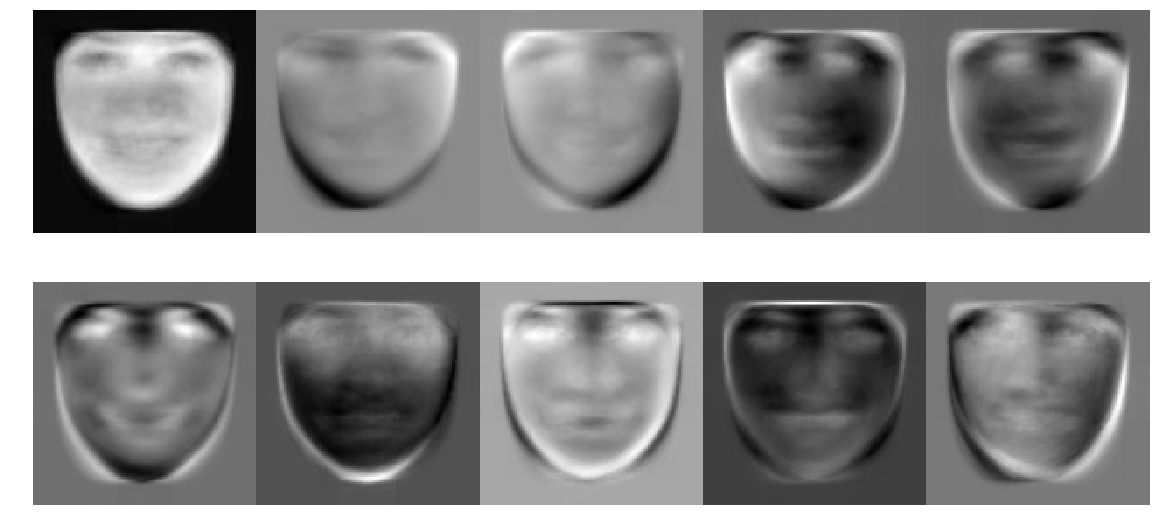

In [8]:
plt.figure(figsize=(20,10))
for i in range(10):
    subplot(2,5,i+1)
    plt.imshow(np.reshape(e[:,i],[128,128]), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
#plt.savefig('PCA_1_1.png')

## ii) Plot 10 reconstructed faces and the corresponding original faces

In [9]:
X_hat=np.zeros(X_test_V.shape)
for i in range(200):
    b=np.zeros((k))
    for j in range(k):
        b[j]=dot((X_test_V[i]-mean_X_train_V ),e[:,j])
        X_hat[i]+=  dot(b[j],e[:,j])
    X_hat[i]=X_hat[i]+mean_X_train_V 
img_hsv_rc=np.zeros((200,128,128,3))
img_rgb_rc=np.zeros(img_hsv_rc.shape)
for i in range(200):
    img_hsv_rc[i,:,:,0]=img_hsv[800+i,:,:,0]
    img_hsv_rc[i,:,:,1]=img_hsv[800+i,:,:,1]
    img_hsv_rc[i,:,:,2]=np.reshape(X_hat[i],[128,128])
    img_rgb_rc[i]=color.hsv2rgb(img_hsv_rc[i])

<Figure size 1440x360 with 0 Axes>

Text(0.5,1,'Original Image')

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Reconstructed Image')

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

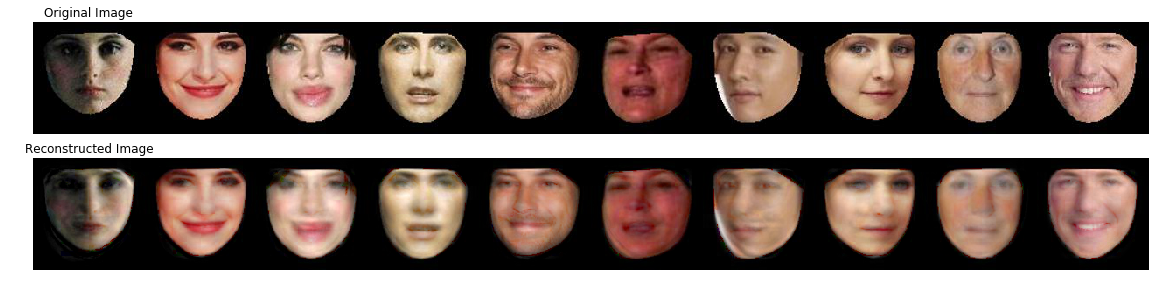

In [10]:
plt.figure(figsize=(20,5))
subplot(2,10,1)
plt.imshow(img_rgb[800])
plt.title('Original Image')
plt.axis('off')
subplot(2,10,11)
plt.imshow(img_rgb_rc[0])
plt.title('Reconstructed Image')
plt.axis('off')
for i in range(9):
    subplot(2,10,i+2)
    plt.imshow(img_rgb[801+i])
    plt.axis('off')
    subplot(2,10,10+i+2)
    plt.imshow(img_rgb_rc[i+1])
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
#plt.savefig('PCA_1_2.png')

## iii) Plot the total reconstruction error per pixal and average over the number of eigen faces K=1,5,10,15,...,50

# 2. Compute the mean and first K=50 eigen-warping of the landmarks for the training faces

In [11]:
from scipy.io import loadmat
import os

In [12]:
path="E:/Stats M231/Project1/landmarks/"  #待读取的文件夹
path_list=os.listdir(path)
path_list.sort() 
lms=np.zeros((1000,68,2))
for i in range(1000):
    x=loadmat(os.path.join(path,path_list[i]))
    lms[i]=x['lms']
lms_train=lms[0:800]
lms_test=lms[800:1000]

In [13]:
lms_train_flat=np.reshape(lms_train,(800,68*2))
lms_test_flat=np.reshape(lms_test,(200,68*2))
mean_lms_train_flat = lms_train_flat.mean(axis=0)
lms_train_flat_norm=np.zeros(lms_train_flat.shape)
for i in range(lms_train_flat.shape[0]):
    lms_train_flat_norm[i] = lms_train_flat[i]- mean_lms_train_flat
U,S,V=np.linalg.svd(lms_train_flat_norm)
S=np.square(S)
#V1=V[:800]
V=V.T  
np.linalg.norm(V[:,0])
S2,V2=np.linalg.eigh(np.dot(lms_train_flat_norm.T,lms_train_flat_norm))
indx=np.argsort(S2)[::-1]
S2=S2[indx]
V2=V2[:,indx]
eigen_warping=V[:,0:50]
#eigen_warping[:,0].shape

0.9999999999999996

## i) Display the first 10 eigen-warpings

<Figure size 1440x720 with 0 Axes>

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

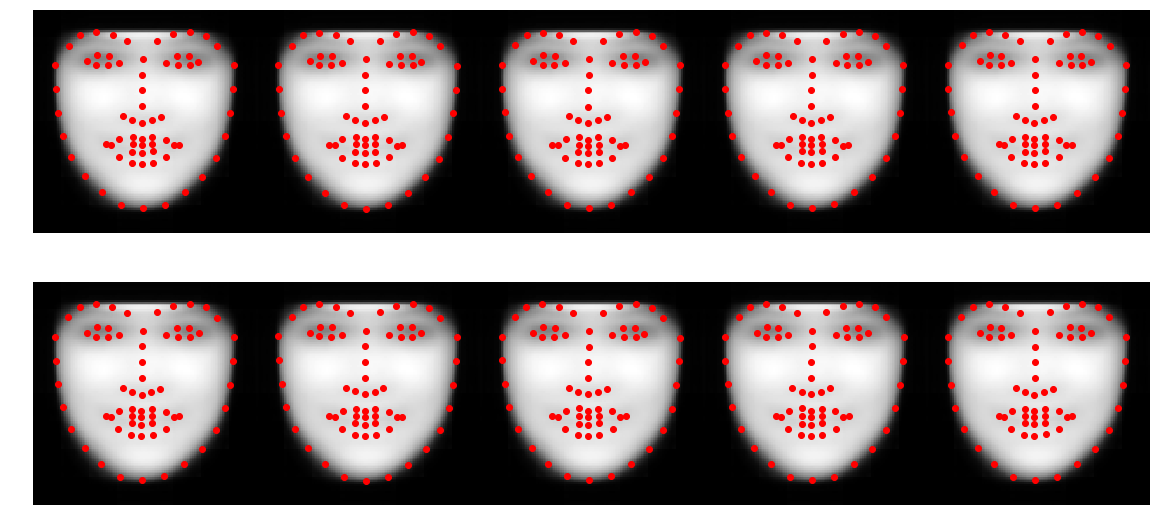

In [14]:
plt.figure(figsize=(20,10))
for i in range(10):
    subplot(2,5,i+1)
    plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')
    eigen_lms=np.reshape((eigen_warping[:,i]+mean_lms_train_flat),[68,2]) 
    plt.scatter(eigen_lms[:,0],eigen_lms[:,1],c='r')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
#plt.savefig('PCA_1_1.png')

## ii) Reconstruct the testing landmarks and plot the reconstruction error

<Figure size 432x288 with 0 Axes>

Text(0.5,0,'Number of eigen-warpings')

Text(0,0.5,'Reconstruction  Error)')

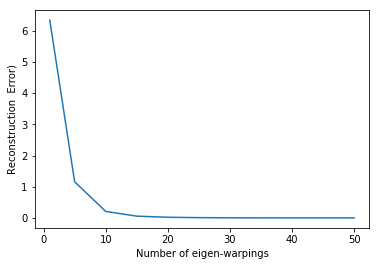

In [16]:
num_K= np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
lms_err=np.zeros(num_K.shape[0])
for j in range(num_K.shape[0]):
    bbb=np.zeros((200,num_K[j]))
    lms_hat=np.zeros(lms_test_flat.shape)
    eigen_k=eigen_warping[:,0:num_K[j]]
    bbb=dot((lms_test_flat-mean_lms_train_flat),eigen_k)
    lms_hat=dot(bbb,np.transpose(eigen_k))+mean_lms_train_flat
    for i in range(200):
        lms_err[j]+=np.sum((np.reshape(lms_hat[i],(1,-1))-np.reshape(lms_test_flat[i],(1,-1)))**2)
lms_err=lms_err/(200*68*2)
plt.figure()
plt.plot(num_K,lms_err)
plt.xlabel("Number of eigen-warpings")
plt.ylabel("(Reconstruction  Error)")
#plt.savefig('PCA_1_5.png')

In [695]:
bbb[0]

array([ 19.90356621, -26.12393311,   2.5338364 ,  15.29226653,
         0.92155445,  -0.41835766,  -8.13756171,  -0.89755678,
         2.19391209,  -1.3299603 ])

<Figure size 2160x504 with 0 Axes>

Text(0.5,1,'Original Image')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5,1,'Reconstructed Image')

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

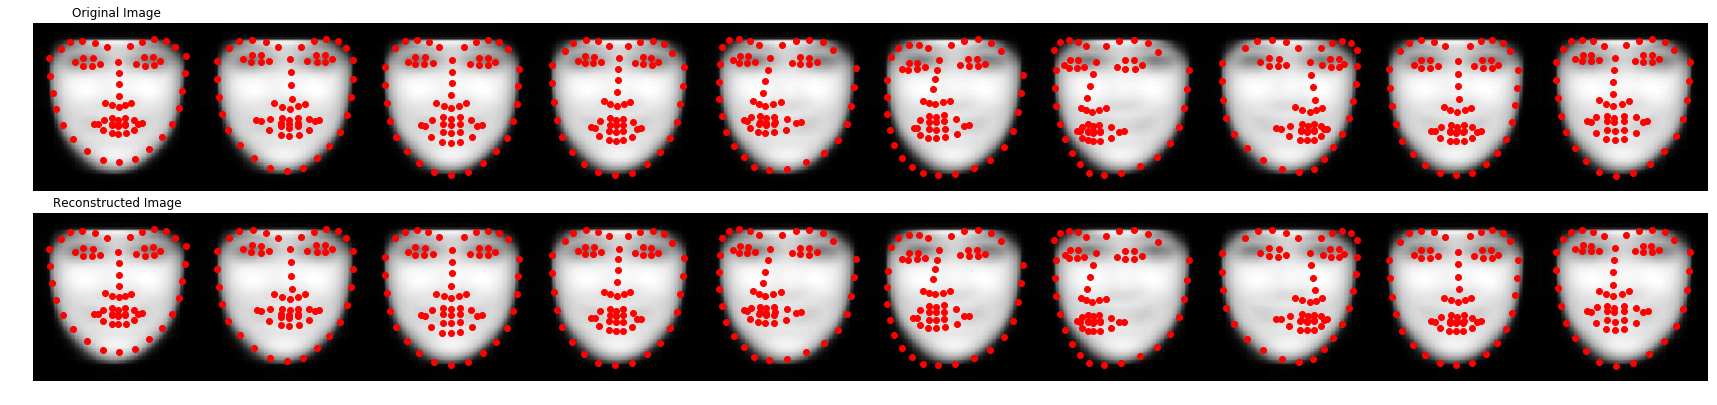

In [17]:
lms_rc=np.reshape(lms_hat,[200,68,2])
plt.figure(figsize=(30,7))
subplot(2,10,1)
plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')
plt.scatter(lms_test[0,:,0],lms_test[0,:,1],c='r')
plt.title('Original Image')
plt.axis('off')
subplot(2,10,11)
plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')
plt.scatter(lms_rc[0,:,0],lms_rc[0,:,1],c='r')
plt.title('Reconstructed Image')
plt.axis('off')
for i in range(9):
    subplot(2,10,i+2)
    plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')
    plt.scatter(lms_test[i+1,:,0],lms_test[i+1,:,1],c='r')
    plt.axis('off')
    subplot(2,10,10+i+2)
    plt.imshow(np.reshape(mean_X_train_V,[128,128]), cmap='gray')
    plt.scatter(lms_rc[i+1,:,0],lms_rc[i+1,:,1],c='r')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

# 3 Combine the two steps above. Reconstruct images using the top 10 eigen-vectors for the warping and then top 50 eigen-vectors for the appearance

In [25]:
X_train_warped=np.zeros((800,128,128,1))
img_warped= np.zeros((1000,128,128,3))
for i in range(800):
    X_train_warped[i]= warp(np.reshape(X_train_V[i],[128,128,1]),lms_train[i],np.reshape(mean_lms_train_flat,[68,2]))

X_train_warped_V= np.reshape(X_train_warped,[800,-1])

for i in range(1000):
    img_warped[i]= warp(img_rgb[i],lms[i],np.reshape(mean_lms_train_flat,[68,2]))
np.save("img_warped.npy", img_warped) 
print("success")
np.save("image_landmarks.npy",lms)
#plt.imshow(np.reshape(X_train_V[0],[128,128]), cmap='gray')
#plt.show()
#plt.imshow(X_train_warped[0,:,:,0], cmap='gray')
#plt.show()

success


In [24]:
img_rgb[0].shape

(128, 128, 3)

In [634]:
mean_X_train_warped_V = X_train_warped_V.mean(axis=0)
X_train_warped_V_norm=np.zeros(X_train_warped_V.shape)
for i in range(X_train_warped_V.shape[0]):
    X_train_warped_V_norm[i] = X_train_warped_V[i]- mean_X_train_warped_V
M = dot(X_train_warped_V_norm,np.transpose(X_train_warped_V_norm))
w,v=np.linalg.eigh(M)
idx=w.argsort()[::-1]
w = w[idx]
v = v[:,idx]
k=50
e_warped=np.zeros((128*128,k))

for i in range(k):
    e_warped[:,i]=dot(np.transpose(X_train_warped_V_norm),v[:,i])
    e_warped[:,i]=e_warped[:,i]/sqrt(w[i])
print ("eigen_warped_face:",e_warped.shape)  

eigen_warped_face: (16384, 50)


<Figure size 1800x720 with 0 Axes>

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

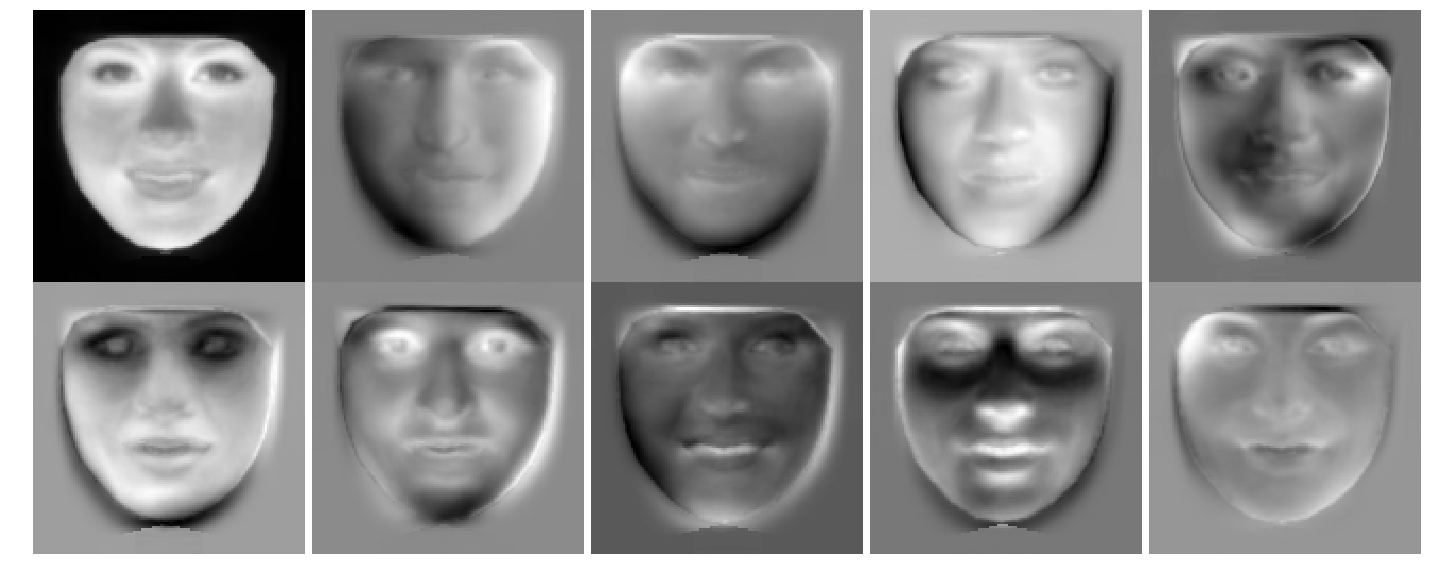

<Figure size 432x288 with 0 Axes>

In [636]:
#Plot the new eigen-faces
plt.figure(figsize=(25,10))
for i in range(10):
    subplot(2,5,i+1)
    plt.imshow(np.reshape(e_warped[:,i],[128,128]), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
plt.savefig('PCA_1_7.png')

## i) Project the landmarks of testing face to the top 10 eigen-warpings

In [639]:
for j in range(10):
    bbb=np.zeros((200,10))
    lms_hat=np.zeros(lms_test_flat.shape)
    eigen_k=eigen_warping[:,0:10]
    bbb=dot((lms_test_flat-mean_lms_train_flat),eigen_k)
    lms_hat=dot(bbb,np.transpose(eigen_k))+mean_lms_train_flat
rc_lms=np.reshape(lms_hat,[200,68,2])


## ii) Warp the face image to the mean position and then project to the top k=50 eigen-faces

In [643]:
X_test_warped=np.zeros((200,128,128,1))
for i in range(200):
    X_test_warped[i]= warp(np.reshape(X_test_V[i],[128,128,1]),lms_test[i],np.reshape(mean_lms_train_flat,[68,2]))

X_test_warped_V= np.reshape(X_test_warped,[200,-1])

<Figure size 432x288 with 0 Axes>

Text(0.5,0,'Number of warped eigen-faces')

Text(0,0.5,'Reconstruction  Error)')

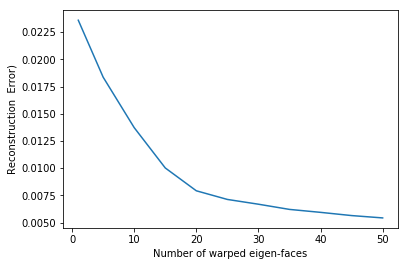

In [644]:
num_K= np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
rc_err_warped=np.zeros(num_K.shape[0])
rc_test_warped=np.zeros((200,128,128,1))
for j in range(num_K.shape[0]):
    bb=np.zeros((200,num_K[j]))
    XX_hat=np.zeros(X_test_warped_V.shape)
    e_k=e_warped[:,0:num_K[j]]
    bb=dot((X_test_warped_V-mean_X_train_warped_V ),e_k)
    XX_hat=dot(bb,np.transpose(e_k))+mean_X_train_warped_V
    for i in range(200):
        rc_test_warped[i]= warp(np.reshape(XX_hat[i],[128,128,1]),np.reshape(mean_lms_train_flat,[68,2]),rc_lms[i])
        rc_err_warped[j]+=np.sum((np.reshape(rc_test_warped[i],(1,-1))-np.reshape(X_test_V[i],(1,-1)))**2)
    
rc_err_warped=rc_err_warped/(200*128*128)
plt.figure()
plt.plot(num_K,rc_err_warped)
plt.xlabel("Number of warped eigen-faces")
plt.ylabel("Reconstruction  Error)")
plt.savefig('PCA_1_8.png')

In [645]:
X_test_V.shape

(200, 16384)

<Figure size 1440x360 with 0 Axes>

Text(0.5,1,'Original Image')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5,1,'Reconstructed Image')

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

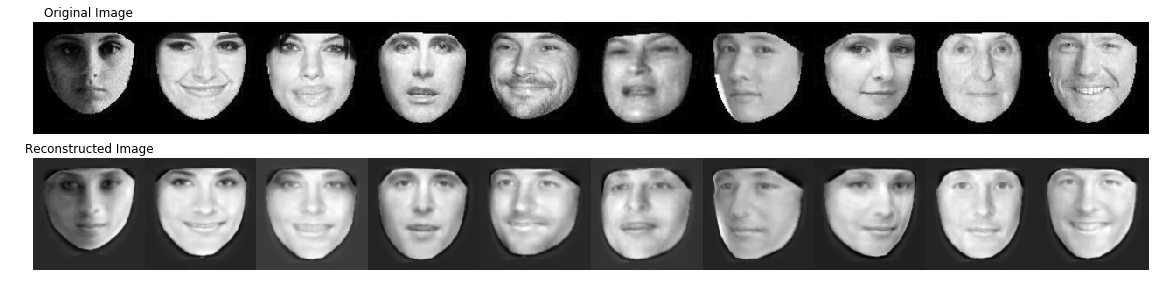

<Figure size 432x288 with 0 Axes>

In [648]:
plt.figure(figsize=(20,5))
subplot(2,10,1)
plt.imshow(np.reshape(X_test_V[0],[128,128]), cmap='gray')
plt.title('Original Image')
plt.axis('off')
subplot(2,10,11)
plt.imshow(np.reshape(rc_test_warped[0],[128,128]),cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
for i in range(9):
    subplot(2,10,i+2)
    plt.imshow(np.reshape(X_test_V[i+1],[128,128]), cmap='gray')
    plt.axis('off')
    subplot(2,10,10+i+2)
    plt.imshow(np.reshape(rc_test_warped[i+1],[128,128]),cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
plt.savefig('PCA_1_9.png')

# 4. Synthesize random faces by random sampling of the landmarks and a random sampling of the appearance.

In [699]:
sigma_lms=np.sqrt(S[0:10]/800)
#sigma_lms=np.sqrt(sigma_lms)
sigma_app=np.sqrt(w[0:50]/800)
#sigma_app=np.sqrt(sigma_app)
random_app=np.zeros((50,128*128))
random_lms=np.zeros((50,68*2))
random_face=np.zeros((50,128,128,1))
b_app=np.zeros((50,50))
b_lms=np.zeros((50,10))
for i in range(50):
    for j in range(50):
        b_app[i,j]= np.random.normal(0, sigma_app[j])
    for k in range(10):
        b_lms[i,k]= np.random.normal(0, sigma_lms[k])
random_app= dot(b_app,np.transpose(e_warped))+mean_X_train_warped_V
random_lms= dot(b_lms,np.transpose(eigen_warping[:,0:10]))+mean_lms_train_flat
for i in range(50):
    random_face[i]= warp(np.reshape(random_app[i],[128,128,1]),np.reshape(mean_lms_train_flat,[68,2]),np.reshape(random_lms[i],[68,2]))


In [697]:
b_app[0]
b_lms[0]

array([  4.56142051,  -3.92213643,  11.77706863,  13.80353597,
        -7.40623325,  -8.33626641,   0.69458395, -14.72708768,
        -0.01647684,   1.89547042,   3.0867516 ,   9.25838578,
        -1.7500266 ,  -2.22636531,   5.17754151,  -1.61233546,
        -4.39448002,   1.83957754,  -8.64668736,   4.05051206,
        -2.08447179,  -7.15895623,   7.61550652,   6.64455577,
         0.32570826,  -1.43389476,  -0.65148834,  -8.83706169,
        -2.37901239,  -3.26958371,   3.43914525,   0.74137265,
         9.6139858 , -12.2914369 ,   3.97360024,   1.72917638,
         2.3669592 ,  -3.282939  ,  -0.39892909,  -1.44679448,
         0.78844799,  -8.21703746,  -0.10773377,   5.42545593,
        -2.276515  ,   8.32150921,   7.42535775,   2.30244428,
        -4.42639037,  -2.84786671])

array([-62.71452403,  -0.49423838,  17.97327081,  13.45988291,
         2.62978064,  -6.68062005,  -7.48523545,   5.57970561,
        -7.93146592,   4.28506741])

## Display 50 synthesized face images

<Figure size 2160x1080 with 0 Axes>

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

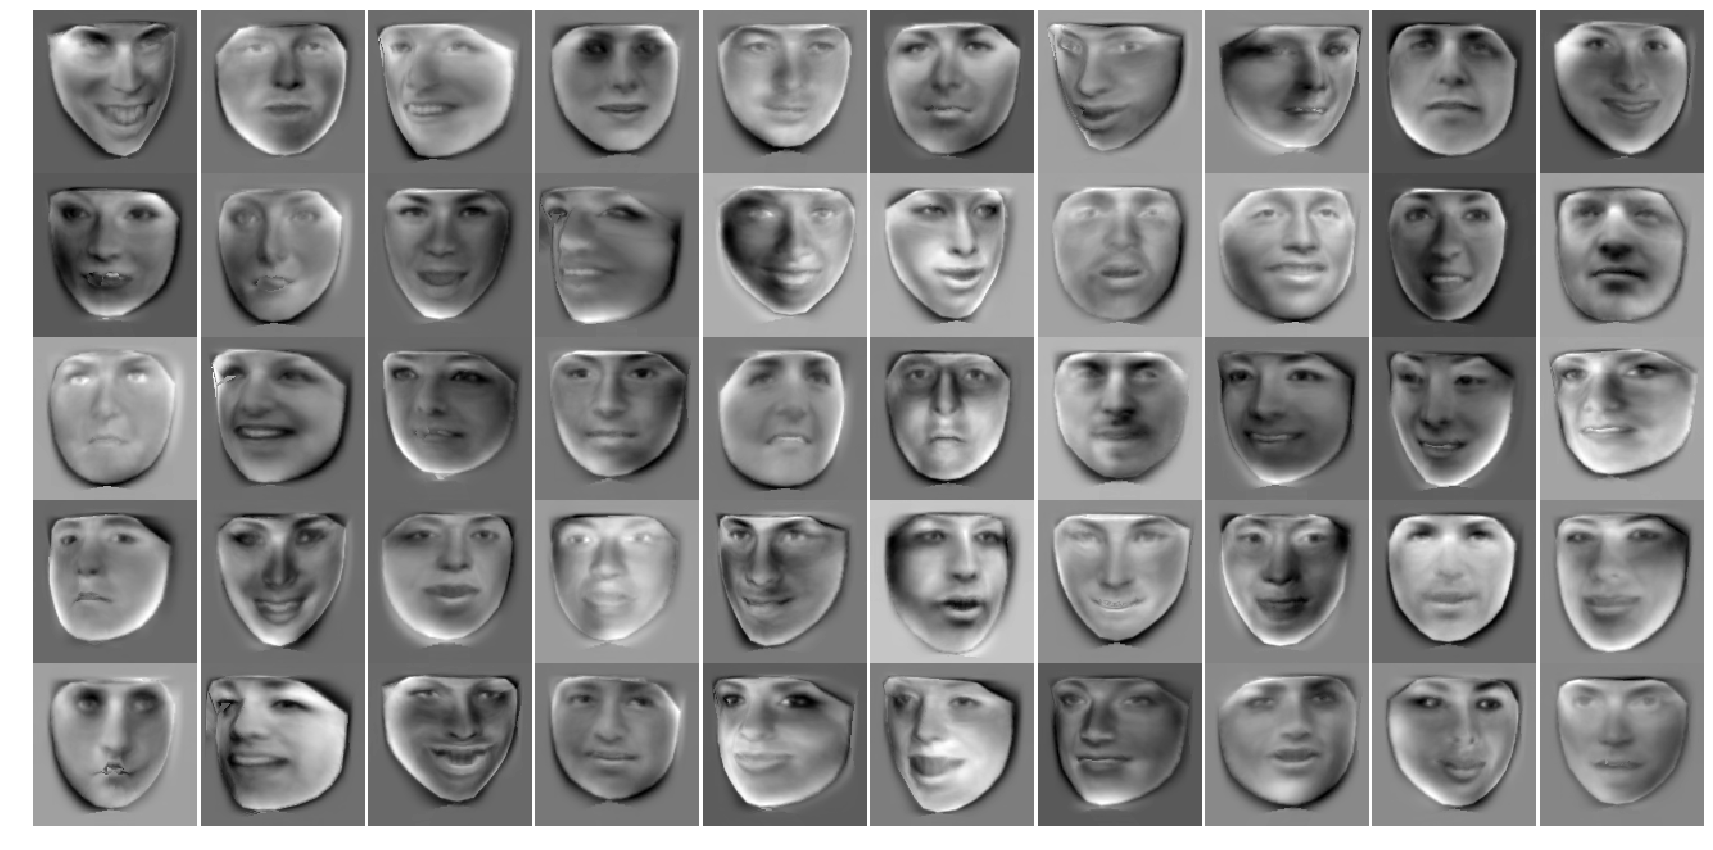

<Figure size 432x288 with 0 Axes>

In [700]:
#Plot the 50 generated human faces
plt.figure(figsize=(30,15))
for i in range(50):
    subplot(5,10,i+1)
    plt.imshow(np.reshape(random_face[i],[128,128]), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace =0, hspace =0)
plt.show()
plt.savefig('PCA_1_10.png')

In [677]:
random_face.shape

(50, 128, 128, 1)

In [22]:
##################################
# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :
    
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
    
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst


# Check if a point is inside a rectangle
def rectContains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[0] + rect[2] :
        return False
    elif point[1] > rect[1] + rect[3] :
        return False
    return True

#calculate delanauy triangle
def calculateDelaunayTriangles(rect, points):
    #create subdiv
    subdiv = cv2.Subdiv2D(rect);
    
    # Insert points into subdiv
    for p in points:
        p1=(int(p[0]),int(p[1]))
        if p1[1]<=rect[2]-1 and p1[0]<=rect[2]-1 and p1[1]>=rect[0] and p1[0]>=rect[0]:
            subdiv.insert(p1) 
    
    triangleList = subdiv.getTriangleList();
    
    delaunayTri = []
    
    pt = []    
        
    for t in triangleList:        
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])        
        
        if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
            ind = []
            #Get face-points (from 68 face detector) by coordinates
            for j in range(0, 3):
                for k in range(0, len(points)):                    
                    if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)    
            # Three points form a triangle. Triangle array corresponds to the file tri.txt in FaceMorph 
            if len(ind) == 3:                                                
                delaunayTri.append((ind[0], ind[1], ind[2]))
        
        pt = []        
            
    
    return delaunayTri

# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2) :

    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    # Offset points by left top corner of the respective rectangles
    t1Rect = [] 
    t2Rect = []
    t2RectInt = []

    for i in range(0, 3):
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))
        t2RectInt.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    w,h,num_chans = img1.shape
    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], num_chans), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0);

    # Apply warpImage to small rectangular patches
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    #img2Rect = np.zeros((r2[3], r2[2]), dtype = img1Rect.dtype)
    
    size = (r2[2], r2[3])

    img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)
    if num_chans==1:
        img2Rect=np.reshape(img2Rect,(r2[3], r2[2], num_chans))
    
    img2Rect = img2Rect * mask

    # Copy triangular region of the rectangular patch to the output image
    if num_chans==1:
        img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( 1.0 - mask )
     
    else:
        img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( (1.0, 1.0, 1.0) - mask )
     
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect 

###################################
def warp(Image,sc,tc):
    '''
    Image: the image to be warped
    sc: original landmarks
    tc: warped landmarks
    '''
    HW,_,_=Image.shape
    cornerps=[[0,0],[0,HW-1],[HW-1,0],[HW-1,HW-1]]
    #cornerps=[[0,0],[0,HW-1],[HW-1,0],[HW-1,HW-1],[0,np.floor(HW/2)],[np.floor(HW/2),0],[HW-1,np.floor(HW/2)],[np.floor(HW/2),HW-1]]

    scl=sc.astype(np.int64).tolist()+cornerps
    tcl=tc.astype(np.int64).tolist()+cornerps
    imgWarped = np.copy(Image);    
    rect = (0, 0, HW, HW)
    dt = calculateDelaunayTriangles(rect,tcl)
# Apply affine transformation to Delaunay triangles
    for i in range(0, len(dt)):
        t1 = []
        t2 = []
        
        #get points for img1, img2 corresponding to the triangles
        for j in range(0, 3):
            t1.append(scl[dt[i][j]])
            t2.append(tcl[dt[i][j]])
        
        warpTriangle(Image, imgWarped, t1, t2)
    return imgWarped

#########################################
def plot(samples,Nh,Nc,channel,IMG_HEIGHT, IMG_WIDTH):
    fig = plt.figure(figsize=(Nc, Nh))
    plt.clf()
    gs = gridspec.GridSpec(Nh, Nc)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples[0:Nh*Nc,:,:,:]):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        if channel==1:
            image=sample.reshape(IMG_HEIGHT, IMG_WIDTH)
            immin=(image[:,:]).min()
            immax=(image[:,:]).max()
            image=(image-immin)/(immax-immin+1e-8)
            plt.imshow(image,cmap ='gray')
        else:
            image=sample.reshape(IMG_HEIGHT, IMG_WIDTH,channel)
            immin=(image[:,:,:]).min()
            immax=(image[:,:,:]).max()
            image=(image-immin)/(immax-immin+1e-8)
            plt.imshow(image)
    return fig 